# Task 1: Feedforward Neural Networks
Wine dataset with 11 properties and the wine quality.

GROUP (INDIVIDUAL):
- Essam Gouda, 1583772 (egouda)

## Imports

In [1]:
import pandas as pd
import numpy as np

from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

from tensorboard.plugins.hparams import api as hp

import matplotlib.pyplot as plt
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white") #white bg for sns plots
sns.set(style="whitegrid", color_codes=True)


import warnings; warnings.simplefilter('ignore')
SEED_NO = 123 #fixed seed number for reproducing the same results.
np.random.seed(SEED_NO)
%load_ext tensorboard
# !rm -rf ./logs/hparam_tuning_reg_task1
# !rm -rf ./logs/hparam_tuning_class_task1

## Reading data

In [2]:
training_data = pd.read_csv('./data/wine_training.csv')
training_data.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.47         0.46             2.2      0.114   
1            7.4              0.74         0.07             1.7      0.086   
2           14.3              0.31         0.74             1.8      0.075   
3            7.5              0.51         0.02             1.7      0.084   
4            9.1              0.52         0.33             1.3      0.070   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                  7.0                  20.0  0.99647  3.32       0.63   
1                 15.0                  48.0  0.99502  3.12       0.48   
2                  6.0                  15.0  1.00080  2.86       0.79   
3                 13.0                  31.0  0.99538  3.36       0.54   
4                  9.0                  30.0  0.99780  3.24       0.60   

   alcohol  quality  
0     10.5        5  
1     10.0        5  
2      8.4        6  
3     10.5        6  
4      9.3        5

In [54]:
testing_data = pd.read_csv('./data/wine_testing.csv')
testing_data.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            6.1             0.530         0.08             1.9      0.077   
1            6.2             0.390         0.43             2.0      0.071   
2            9.3             0.430         0.44             1.9      0.085   
3            7.0             0.735         0.05             2.0      0.081   
4           10.7             0.900         0.34             6.6      0.112   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                   24                    45  0.99528  3.60       0.68   
1                   14                    24  0.99428  3.45       0.87   
2                    9                    22  0.99708  3.28       0.55   
3                   13                    54  0.99660  3.39       0.57   
4                   23                    99  1.00289  3.22       0.68   

   alcohol  
0     10.3  
1     11.2  
2      9.5  
3      9.8  
4      9.3

## EDA

### Dataset information

In [4]:
training_data.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1280.000000       1280.000000  1280.000000     1280.000000   
mean        8.272109          0.527457     0.267461        2.504883   
std         1.713921          0.175386     0.193971        1.381727   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.250000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.600000          1.330000     1.000000       15.400000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1280.000000          1280.000000           1280.000000  1280.000000   
mean      0.087516            16.061719             46.974219     0.996714   
std       0.046164            10.636437             33.404522     0.001857   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.080000            14.000000             38.000000     0.996710   
75%       0.090000            22.000000             63.000000     0.997800   
max       0.610000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1280.000000  1280.000000  1280.000000  1280.000000  
mean      3.314109     0.658586    10.415247     5.620312  
std       0.155614     0.171517     1.056314     0.808222  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.320000     0.620000    10.100000     6.000000  
75%       3.410000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.000000     8.000000

In [5]:
training_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1280 entries, 0 to 1279
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1280 non-null   float64
 1   volatile acidity      1280 non-null   float64
 2   citric acid           1280 non-null   float64
 3   residual sugar        1280 non-null   float64
 4   chlorides             1280 non-null   float64
 5   free sulfur dioxide   1280 non-null   float64
 6   total sulfur dioxide  1280 non-null   float64
 7   density               1280 non-null   float64
 8   pH                    1280 non-null   float64
 9   sulphates             1280 non-null   float64
 10  alcohol               1280 non-null   float64
 11  quality               1280 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 120.1 KB


In [7]:
print("Unique values for each feature:")
for i in training_data.columns:
    print(i, len(training_data[i].unique()))

Unique values for each feature:
fixed acidity 93
volatile acidity 138
citric acid 78
residual sugar 85
chlorides 141
free sulfur dioxide 59
total sulfur dioxide 143
density 398
pH 86
sulphates 92
alcohol 61
quality 6


It can be seen that the data doesn't need cleaning as it has 0 null values.

### Correlation matrix
From the correlation matrix we can see the relations between the features.

<AxesSubplot:>

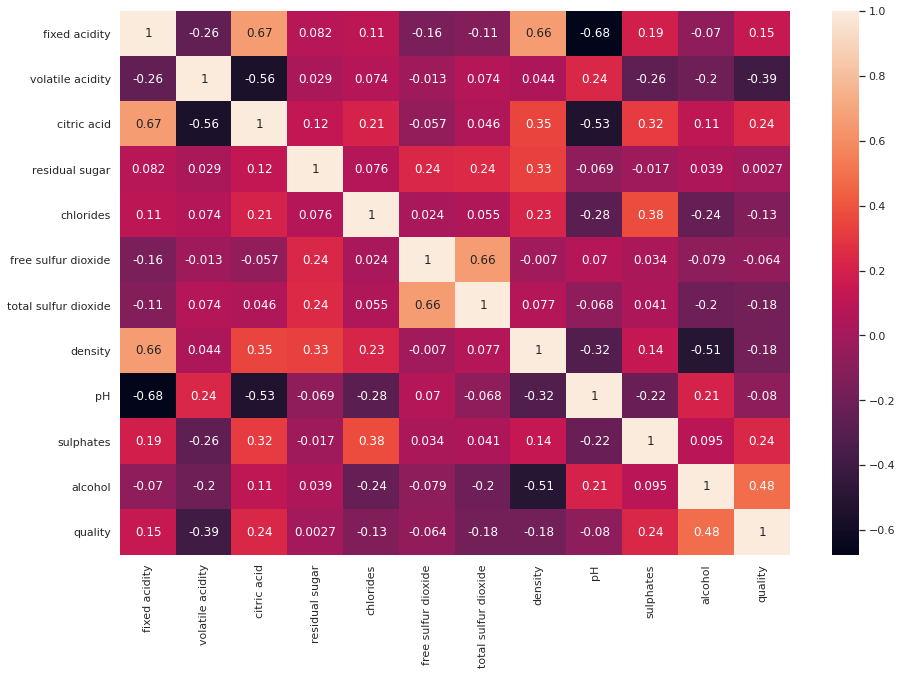

In [8]:
plt.subplots(figsize=(15, 10))
correlations = training_data.corr()
sns.heatmap(training_data.corr(), annot=True)

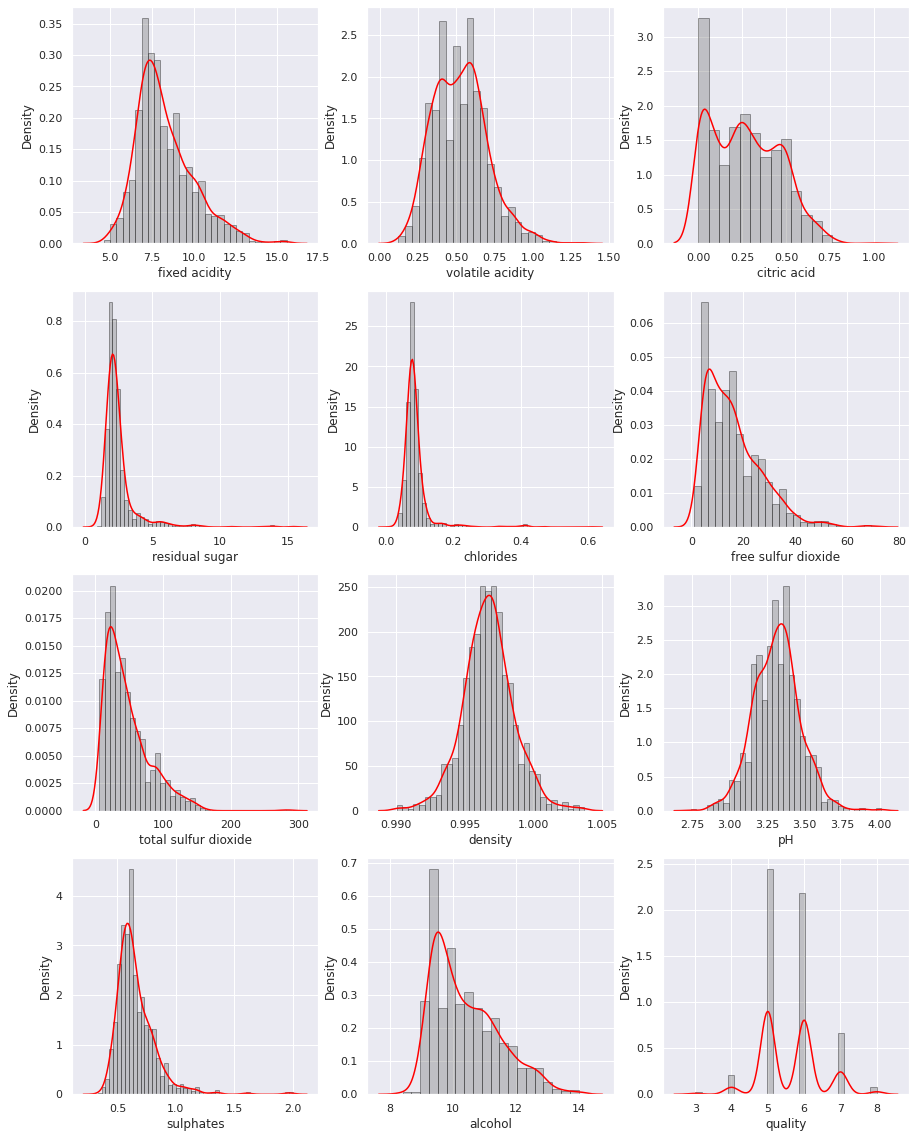

In [9]:
sns.set()
fig = plt.figure(figsize = [15, 20])

plt_cnt = 1
for col in training_data.columns:
    plt.subplot(4, 3, plt_cnt)
    sns.distplot(training_data[col], hist_kws=dict(edgecolor='k', linewidth=1, color='grey'), color='red')
    plt_cnt += 1
plt.show()

The data could be seen that it typicall follows a normal distribution but the average quality (5 and 6) could be seen to have the highest density.

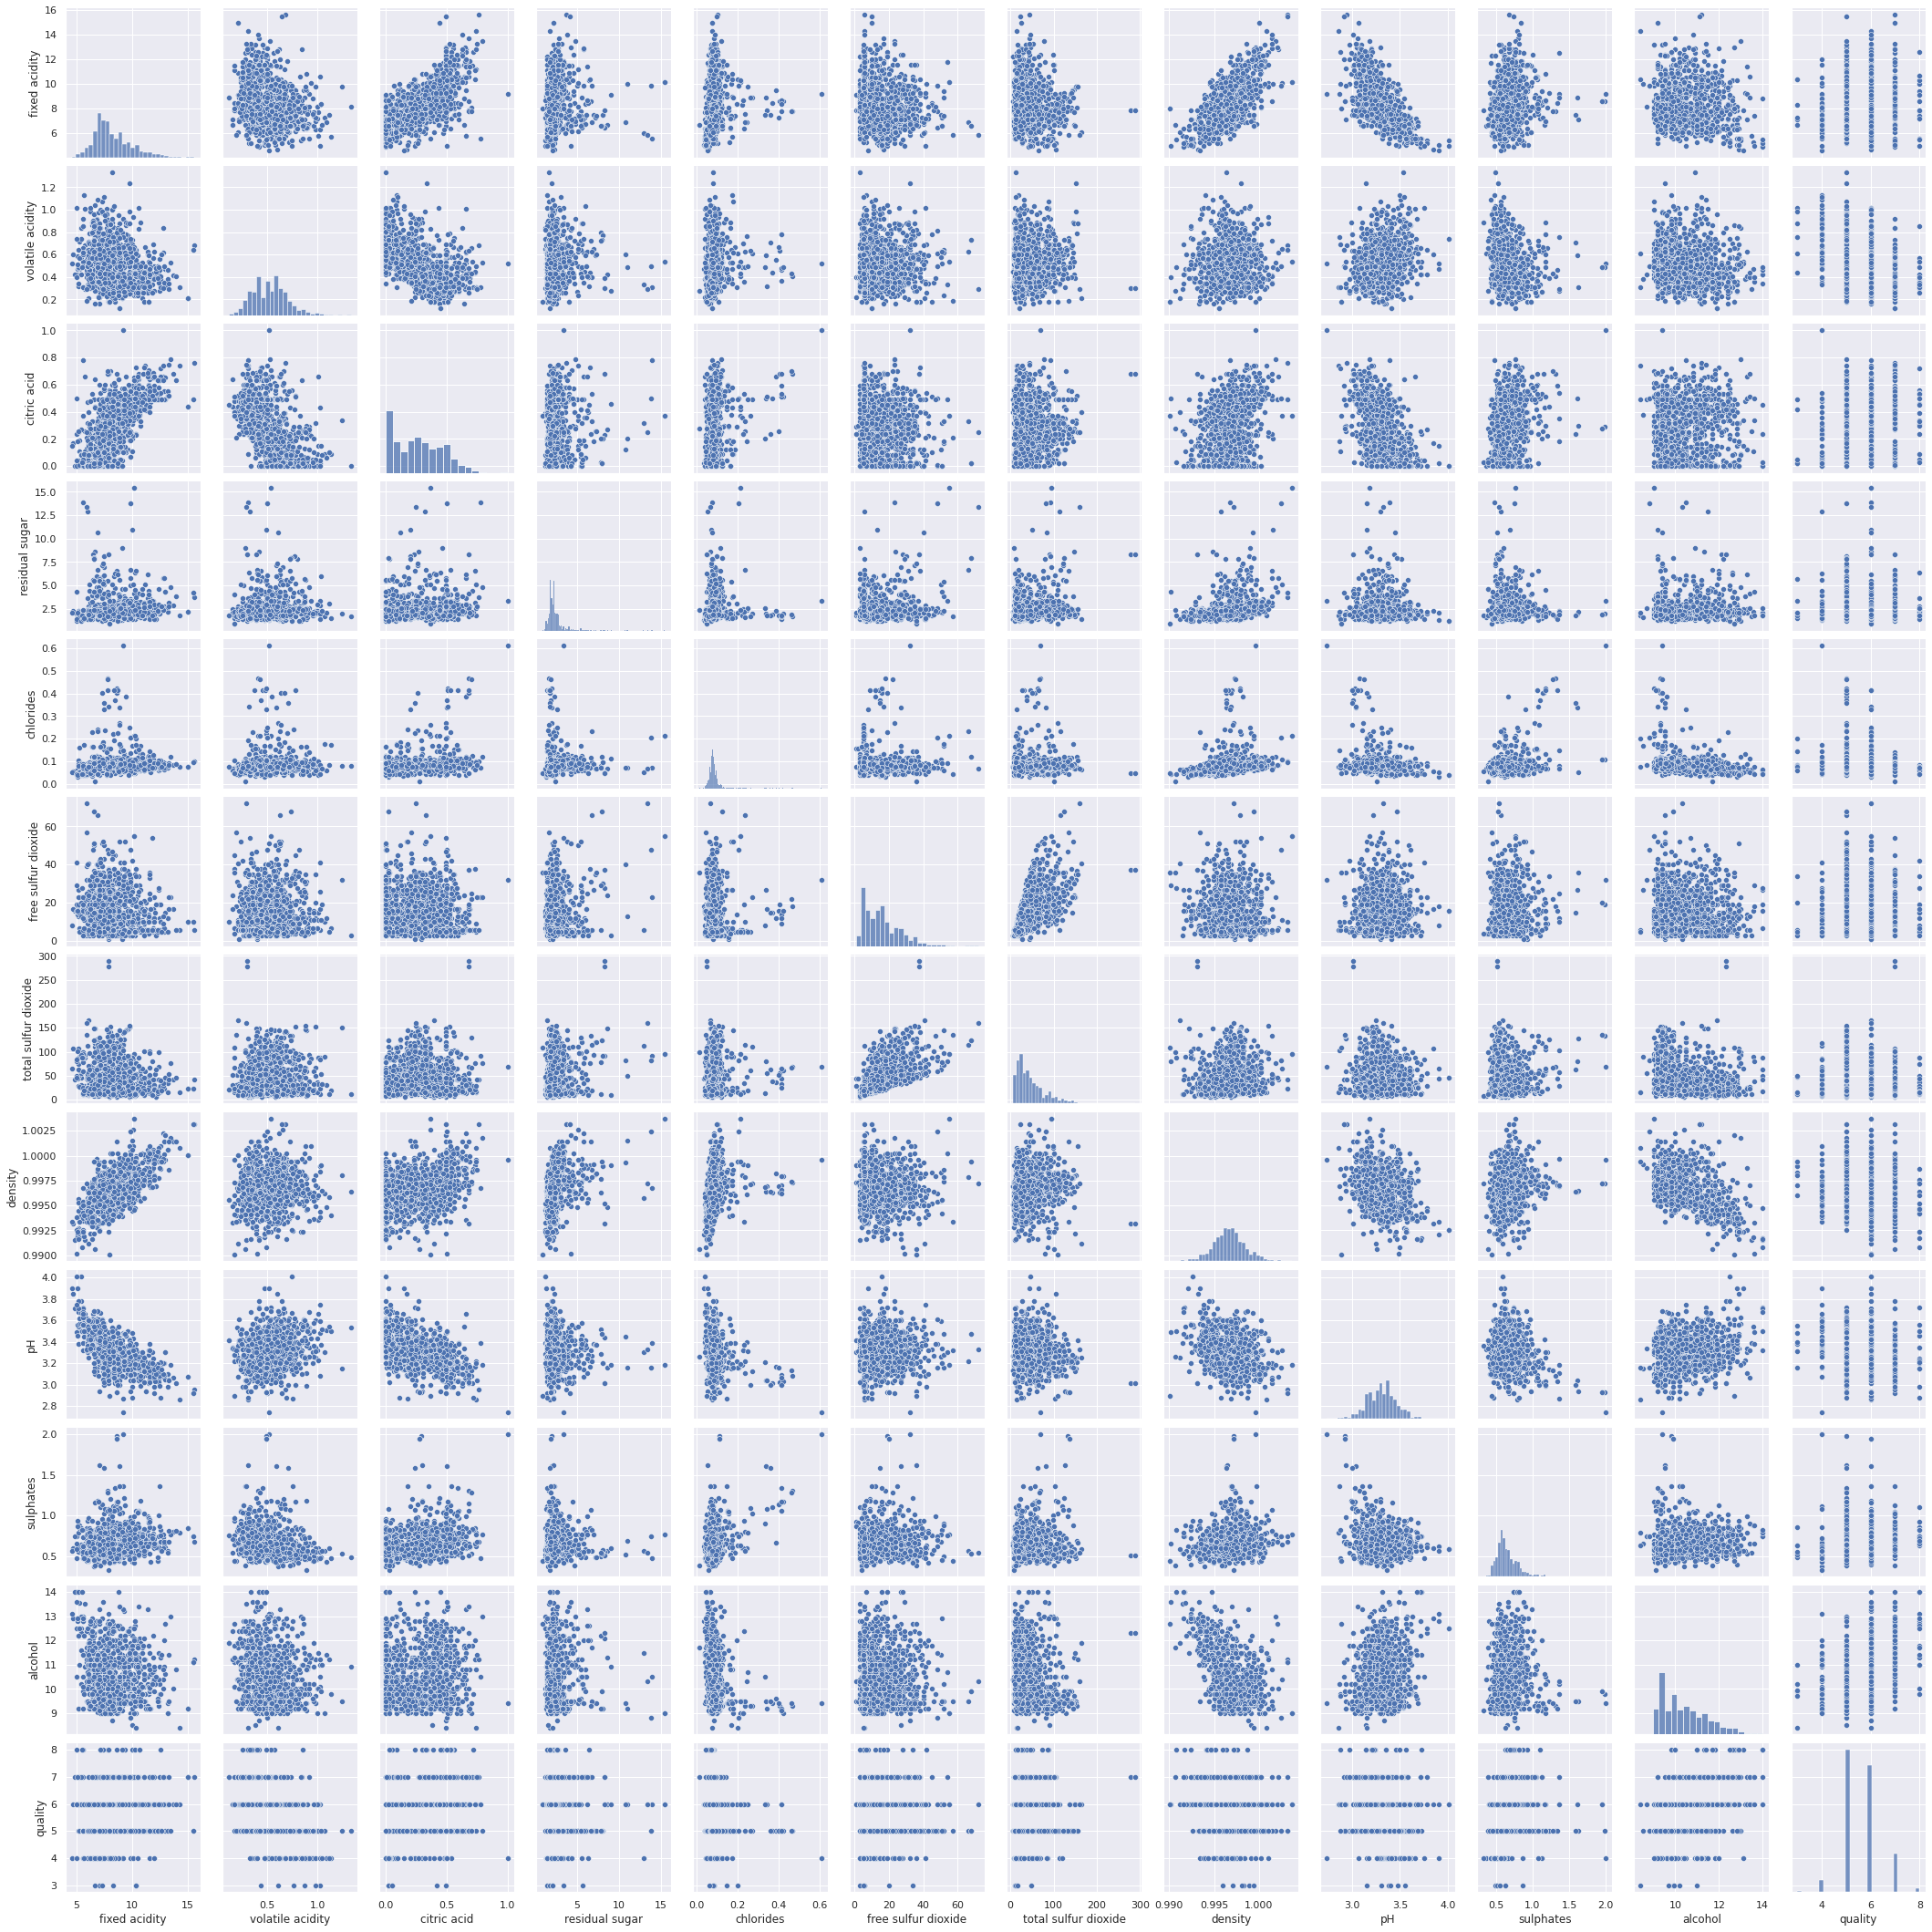

In [10]:
sns.pairplot(training_data)
plt.show()

Plotting every feature with quality shows that density, chlorides, resuidual sugar and pH don't change much as the quality changes thus these features could be ignored.

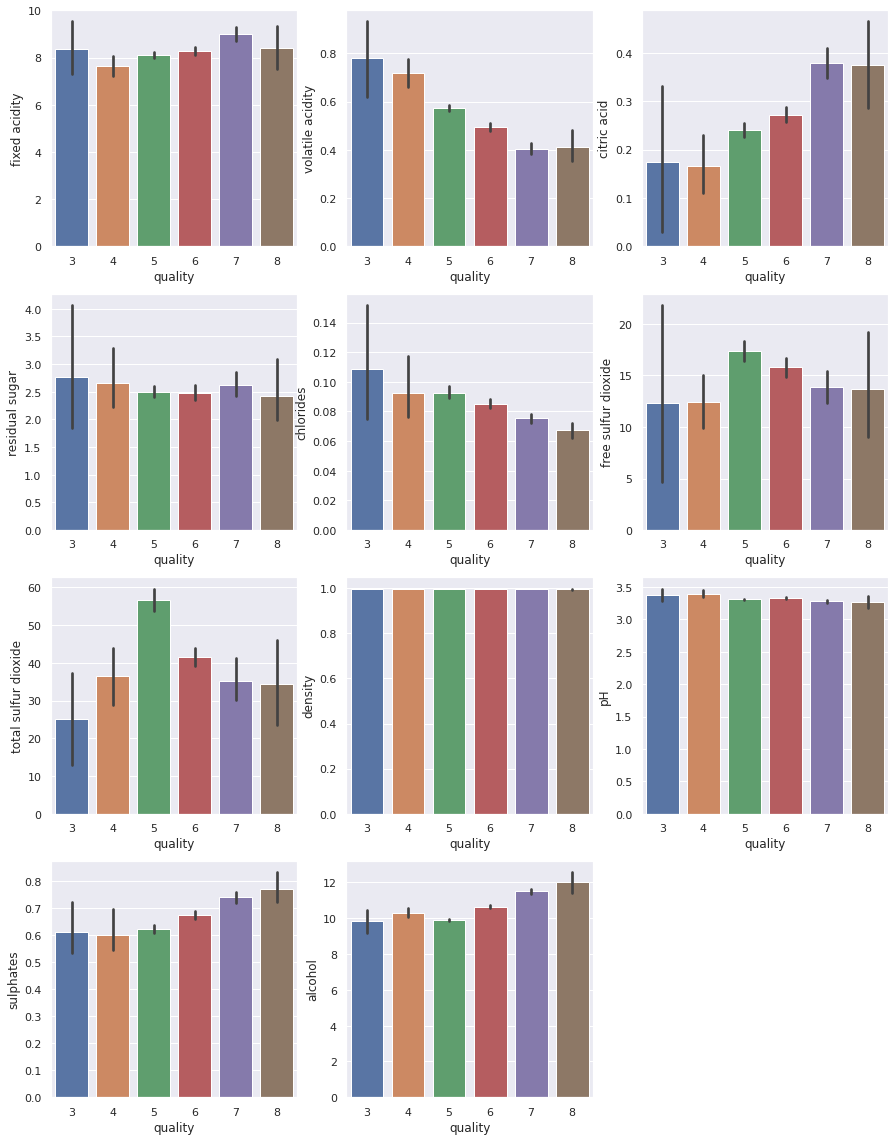

In [11]:
fig = plt.figure(figsize = [15, 20])
plt_cnt = 1

for col in training_data.loc[:, training_data.columns != 'quality'].columns:
    plt.subplot(4, 3, plt_cnt)
    sns.barplot(data = training_data, x = 'quality', y = col)
    plt_cnt += 1
plt.show()

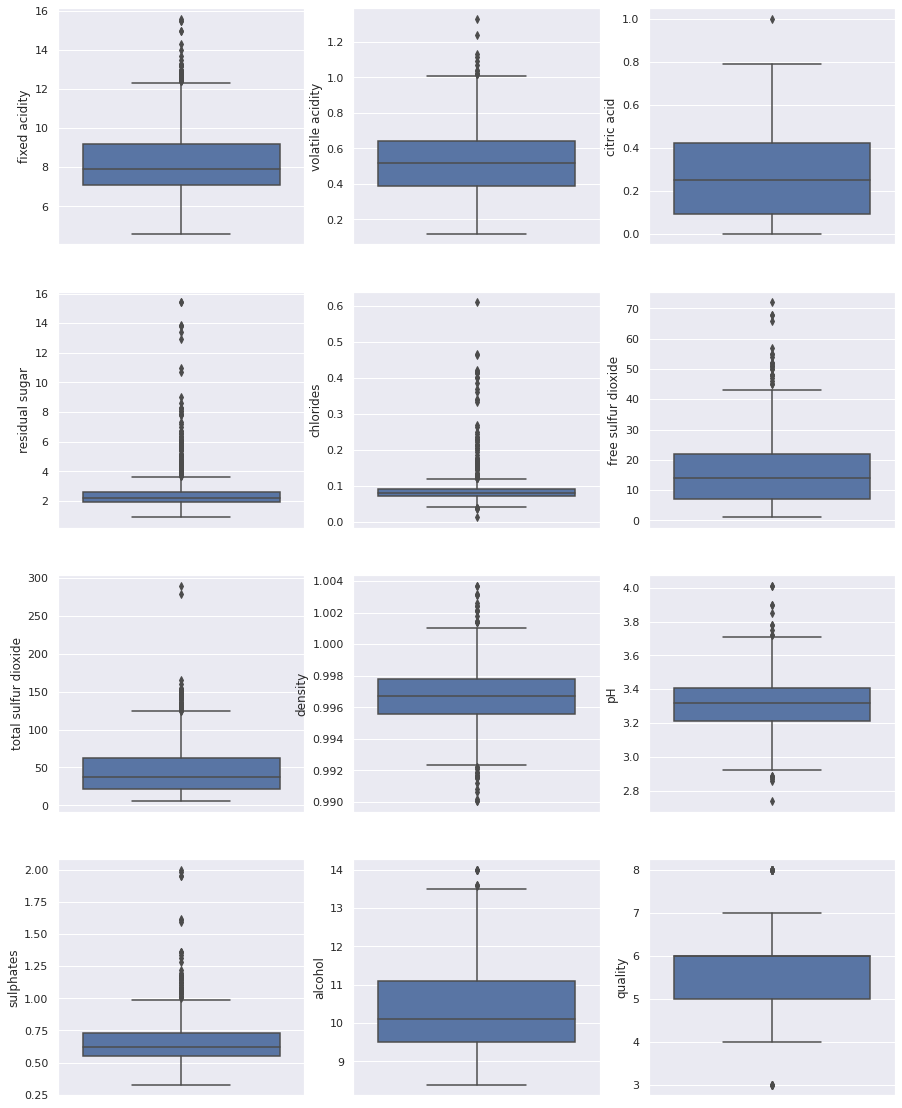

In [12]:
fig = plt.figure(figsize = [15, 20])
plt_cnt = 1

for col in training_data.columns:
    plt.subplot(4, 3, plt_cnt)
    sns.boxplot(data = training_data, y = col)
    plt_cnt += 1
plt.show()

Add quality class for visualization

In [13]:
training_data['quality_class'] = training_data['quality'].apply(lambda x : 0 if x < 5 else (2 if x >= 7 else 1) )
training_data.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.47         0.46             2.2      0.114   
1            7.4              0.74         0.07             1.7      0.086   
2           14.3              0.31         0.74             1.8      0.075   
3            7.5              0.51         0.02             1.7      0.084   
4            9.1              0.52         0.33             1.3      0.070   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                  7.0                  20.0  0.99647  3.32       0.63   
1                 15.0                  48.0  0.99502  3.12       0.48   
2                  6.0                  15.0  1.00080  2.86       0.79   
3                 13.0                  31.0  0.99538  3.36       0.54   
4                  9.0                  30.0  0.99780  3.24       0.60   

   alcohol  quality  quality_class  
0     10.5        5              1  
1     10.0        5              1  
2      8.4        6              1  
3     10.5        6              1  
4      9.3        5              1

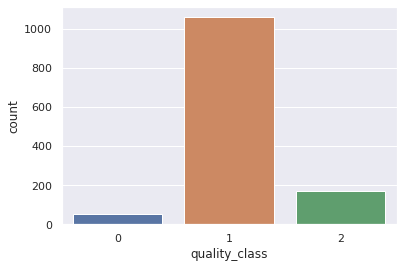

In [14]:
sns.countplot(data = training_data, x = 'quality_class')
plt.show()

<AxesSubplot:xlabel='quality', ylabel='count'>

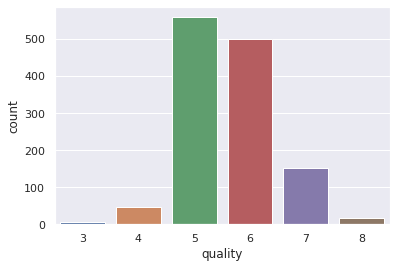

In [15]:
sns.countplot(training_data['quality'])

It can be seen that the average quality is the most common one.

The violin plot is used to check the distribution of the values for each feature in each quality class around their median.

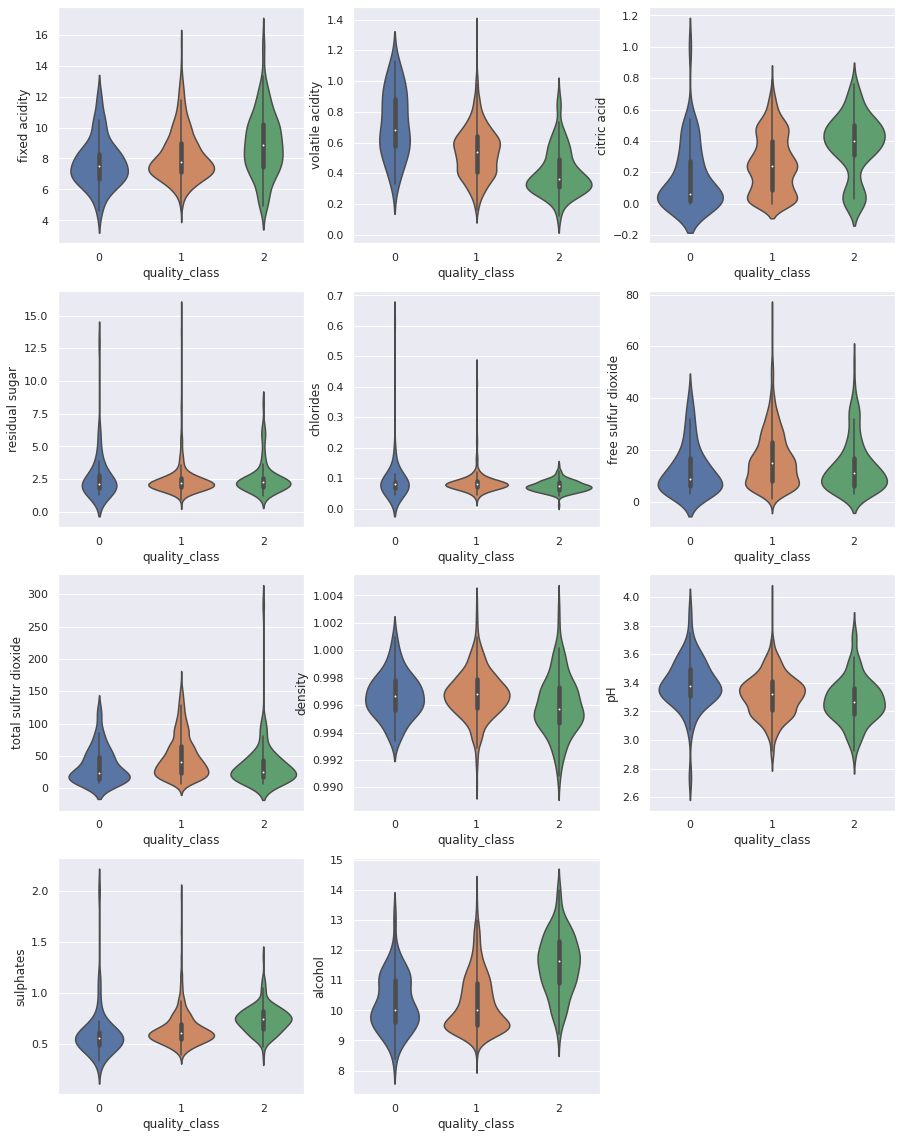

In [16]:
fig = plt.figure(figsize = [15, 20])
plt_cnt = 1

for col in training_data.loc[:, (training_data.columns != 'quality') & (training_data.columns != 'quality_class')].columns:
    plt.subplot(4, 3, plt_cnt)
    sns.violinplot(x='quality_class', y=col, data=training_data)
    plt_cnt += 1
plt.show()

## Pre-processing the data

In [17]:
df_reg_train = training_data.copy()
df_reg_test = testing_data.copy()
df_class_train = training_data.copy()
df_class_test = testing_data.copy()

In [18]:
df_reg_train.columns[(df_reg_train.columns != 'quality') & (df_reg_train.columns != 'quality_class')]

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

Only the highest absolute values of correlations are used for regression.

In [19]:
correlations[abs(correlations['quality']) > 0.2]

fixed acidity  volatile acidity  citric acid  \
volatile acidity      -0.255107          1.000000    -0.557023   
citric acid            0.665083         -0.557023     1.000000   
sulphates              0.188454         -0.257292     0.318258   
alcohol               -0.070149         -0.204572     0.111029   
quality                0.145761         -0.392837     0.236725   

                  residual sugar  chlorides  free sulfur dioxide  \
volatile acidity        0.029240   0.073828            -0.013295   
citric acid             0.124109   0.210686            -0.056867   
sulphates              -0.017430   0.377515             0.033937   
alcohol                 0.038635  -0.236029            -0.079452   
quality                 0.002712  -0.129443            -0.064211   

                  total sulfur dioxide   density        pH  sulphates  \
volatile acidity              0.073907  0.043649  0.237018  -0.257292   
citric acid                   0.046352  0.348885 -0.530322   0.318258   
sulphates                     0.040633  0.136901 -0.223174   1.000000   
alcohol                      -0.203075 -0.505281  0.208831   0.095256   
quality                      -0.179160 -0.181762 -0.079590   0.238595   

                   alcohol   quality  
volatile acidity -0.204572 -0.392837  
citric acid       0.111029  0.236725  
sulphates         0.095256  0.238595  
alcohol           1.000000  0.483252  
quality           0.483252  1.000000

In [20]:
# for regression 
# X_reg = df_reg_train[df_reg_train.columns[(df_reg_train.columns != 'quality') & (df_reg_train.columns != 'quality_class')]]
X_reg = df_reg_train[['volatile acidity', 'citric acid', 'sulphates', 'alcohol']]
y_reg = df_reg_train[['quality']]
X_reg_test = df_reg_test[['volatile acidity', 'citric acid', 'sulphates', 'alcohol']]

Scaling is applied for the chosen features.

In [21]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

ss = StandardScaler()

X_reg[X_reg.columns] = ss.fit_transform(X_reg[X_reg.columns])
X_reg_test[X_reg_test.columns] = ss.transform(X_reg_test[X_reg_test.columns])

In [22]:
n_cols_reg = X_reg.shape[1]
n_cols_reg

4

In [23]:
# for classification
X_class = df_class_train[df_class_train.columns[(df_class_train.columns != 'quality') & (df_class_train.columns != 'quality_class')]]
X_class_test = df_class_test[df_class_test.columns[(df_class_test.columns != 'quality') & (df_class_test.columns != 'quality_class')]]
y_class = df_class_train[['quality_class']]

One-hot encoding is used for labeling instead of the typical label encoing and this is due to the fact that the classses are not equidistant between one another so for some cases prediciting a probability for each class this might lead to the NN prediciting a wrong class due to the fact that it's equally sure that the probability of the output is between different classes. This problem is solved with one-hot encoding.

In [24]:
from sklearn.preprocessing import OneHotEncoder
y_class = OneHotEncoder().fit_transform(y_class).toarray()
y_class

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [25]:
n_cols_class = X_class.shape[1]
n_classes = y_class.shape[1]
n_cols_class, n_classes

(11, 3)

### Regression model

### Hyperparameter tuning

NOTE: this part doesn't need to be re-run as it takes a long time to find the best params so the results could be seen below.

In [26]:
import keras
from keras.layers import Dense, Dropout
from keras.models import Sequential

from sklearn.model_selection import KFold

In [27]:
def reg_model_hyper(hparams):
    model = Sequential()
    model.add(Dense(hparams[HP_DENSE_NUM], activation = hparams[HP_ACTIVATION], input_shape=(n_cols_reg,)))
    model.add(Dropout(hparams[HP_DROPOUT]))
    if hparams[HP_HIDDEN] == 1:
        model.add(Dense(hparams[HP_DENSE_NUM], activation = hparams[HP_ACTIVATION]))
    elif hparams[HP_HIDDEN] == 2:    
        model.add(Dense(hparams[HP_DENSE_NUM], activation = hparams[HP_ACTIVATION]))
        model.add(Dense(hparams[HP_DENSE_NUM], activation = hparams[HP_ACTIVATION]))
    model.add(Dense(1))    
    
    
    model.compile(optimizer=hparams[HP_OPTIMIZER], loss='mean_squared_error')
    
    model.fit(X_reg.values, y_reg.values, batch_size=64, epochs=100, verbose=0)
    accuracy = model.evaluate(X_reg.values, y_reg.values)
    
    return accuracy

In [28]:
HP_DENSE_NUM = hp.HParam('DENSE NUM', hp.Discrete([50,60])) 
HP_HIDDEN = hp.HParam('HIDDEN LAYERS', hp.Discrete([0, 1, 2])) 
HP_DROPOUT = hp.HParam('dropout', hp.RealInterval(0.1, 0.2))
HP_OPTIMIZER = hp.HParam('optimizer', hp.Discrete(['adam', 'sgd','RMSprop']))
HP_ACTIVATION = hp.HParam('activation func', hp.Discrete(['relu', 'gelu','selu']))
METRIC_ACCURACY = 'mean_squared_error'

with tf.summary.create_file_writer('logs/hparam_tuning_reg_task1').as_default():
  hp.hparams_config(
    hparams=[HP_DENSE_NUM, HP_HIDDEN, HP_DROPOUT ,HP_OPTIMIZER, HP_ACTIVATION],
    metrics=[hp.Metric(METRIC_ACCURACY, display_name='Loss')],
  )

In [29]:
def run(run_dir, hparams):
  with tf.summary.create_file_writer(run_dir).as_default():
    hp.hparams(hparams)  # record the values used in this trial
    accuracy = reg_model_hyper(hparams)
    tf.summary.scalar(METRIC_ACCURACY, accuracy, step=1)

In [30]:
session_num = 0
for dense_num in HP_DENSE_NUM.domain.values:
    for hidden_num in HP_HIDDEN.domain.values:
        for dropout_rate in (HP_DROPOUT.domain.min_value, HP_DROPOUT.domain.max_value):
                for optimizer in HP_OPTIMIZER.domain.values:
                    for act in HP_ACTIVATION.domain.values:

                        hparams = {
                          HP_DENSE_NUM: dense_num,
                          HP_HIDDEN: hidden_num,
                          HP_DROPOUT: dropout_rate,
                          HP_OPTIMIZER: optimizer,
                          HP_ACTIVATION: act

                        }
                        run_name = "run-%d" % session_num
                        print('--- Starting trial: %s' % run_name)
                        print({h.name: hparams[h] for h in hparams})
                        run('logs/hparam_tuning_reg_task1/' + run_name, hparams)
                        session_num += 1

--- Starting trial: run-0
{'DENSE NUM': 50, 'HIDDEN LAYERS': 0, 'dropout': 0.1, 'optimizer': 'RMSprop', 'activation func': 'gelu'}
40/40 [==============================] - 0s 467us/step - loss: 0.4054
--- Starting trial: run-1
{'DENSE NUM': 50, 'HIDDEN LAYERS': 0, 'dropout': 0.1, 'optimizer': 'RMSprop', 'activation func': 'relu'}
40/40 [==============================] - 0s 423us/step - loss: 0.3916
--- Starting trial: run-2
{'DENSE NUM': 50, 'HIDDEN LAYERS': 0, 'dropout': 0.1, 'optimizer': 'RMSprop', 'activation func': 'selu'}
40/40 [==============================] - 0s 485us/step - loss: 0.4130
--- Starting trial: run-3
{'DENSE NUM': 50, 'HIDDEN LAYERS': 0, 'dropout': 0.1, 'optimizer': 'adam', 'activation func': 'gelu'}
40/40 [==============================] - 0s 503us/step - loss: 0.4108
--- Starting trial: run-4
{'DENSE NUM': 50, 'HIDDEN LAYERS': 0, 'dropout': 0.1, 'optimizer': 'adam', 'activation func': 'relu'}
40/40 [==============================] - 0s 408us/step - loss: 0.4043
-

40/40 [==============================] - 0s 485us/step - loss: 0.3760
--- Starting trial: run-42
{'DENSE NUM': 50, 'HIDDEN LAYERS': 2, 'dropout': 0.1, 'optimizer': 'sgd', 'activation func': 'gelu'}
40/40 [==============================] - 0s 534us/step - loss: 0.3986
--- Starting trial: run-43
{'DENSE NUM': 50, 'HIDDEN LAYERS': 2, 'dropout': 0.1, 'optimizer': 'sgd', 'activation func': 'relu'}
40/40 [==============================] - 0s 524us/step - loss: 0.3746
--- Starting trial: run-44
{'DENSE NUM': 50, 'HIDDEN LAYERS': 2, 'dropout': 0.1, 'optimizer': 'sgd', 'activation func': 'selu'}
40/40 [==============================] - 0s 481us/step - loss: 0.3984
--- Starting trial: run-45
{'DENSE NUM': 50, 'HIDDEN LAYERS': 2, 'dropout': 0.2, 'optimizer': 'RMSprop', 'activation func': 'gelu'}
40/40 [==============================] - 0s 574us/step - loss: 0.3986
--- Starting trial: run-46
{'DENSE NUM': 50, 'HIDDEN LAYERS': 2, 'dropout': 0.2, 'optimizer': 'RMSprop', 'activation func': 'relu'}
40

In [2]:
%tensorboard --logdir logs/hparam_tuning_reg_task1 --host localhost

### Final model on 10-fold cross validation
It can be seen from the hyperparamter tuning that the best params are (ones with the least loss):
- Dense num = 60
- Hidden layers = 2
- dropout = 0.1
- optimizer = RMSprop
- activation = relu

with a loss of 0.35662

In [42]:
def reg_model(n_cols):
    model = Sequential()
    model.add(Dense(60, activation='relu', input_shape=(n_cols,)))
    model.add(Dropout(0.1))
    model.add(Dense(60, activation='relu'))  
    model.add(Dense(60, activation='relu'))  
    model.add(Dense(1))    
    
    
    model.compile(optimizer='RMSprop', loss='mean_squared_error')
    
    return model

In [43]:
kfold = KFold(n_splits=10, shuffle=True)
fold_no = 1

for train, test in kfold.split(X_reg, y_reg):
    print("################################")
    print(f"Training for fold {fold_no} ...")
    model = reg_model(n_cols_reg)
    history = model.fit(X_reg.iloc[train].values, y_reg.iloc[train].values, batch_size=64, epochs=100, verbose=0)
    scores = model.evaluate(X_reg.iloc[test].values, y_reg.iloc[test].values, verbose=5)

    print(f"Score for fold {fold_no}: {model.metrics_names[0]} of {scores}")
    
    fold_no += 1

################################
Training for fold 1 ...
Score for fold 1: loss of 0.5172765851020813
################################
Training for fold 2 ...
Score for fold 2: loss of 0.3702685832977295
################################
Training for fold 3 ...
Score for fold 3: loss of 0.44938766956329346
################################
Training for fold 4 ...
Score for fold 4: loss of 0.5635277628898621
################################
Training for fold 5 ...
Score for fold 5: loss of 0.39990732073783875
################################
Training for fold 6 ...
Score for fold 6: loss of 0.3925098776817322
################################
Training for fold 7 ...
Score for fold 7: loss of 0.37438589334487915
################################
Training for fold 8 ...
Score for fold 8: loss of 0.4924981892108917
################################
Training for fold 9 ...
Score for fold 9: loss of 0.4762544631958008
################################
Training for fold 10 ...
Score for fold 10: lo

### Final Regression model
Evaluation on test data and submission as csv

In [44]:
model = reg_model(n_cols_reg)

In [45]:
history = model.fit(X_reg.values,y_reg.values,epochs=100)

Epoch 1/100
40/40 [==============================] - 0s 810us/step - loss: 21.4263
Epoch 2/100
40/40 [==============================] - 0s 850us/step - loss: 2.6021
Epoch 3/100
40/40 [==============================] - 0s 828us/step - loss: 1.9139
Epoch 4/100
40/40 [==============================] - 0s 839us/step - loss: 1.4338
Epoch 5/100
40/40 [==============================] - 0s 882us/step - loss: 0.9510
Epoch 6/100
40/40 [==============================] - 0s 884us/step - loss: 0.7778
Epoch 7/100
40/40 [==============================] - 0s 884us/step - loss: 0.6621
Epoch 8/100
40/40 [==============================] - 0s 929us/step - loss: 0.5719
Epoch 9/100
40/40 [==============================] - 0s 1ms/step - loss: 0.5439
Epoch 10/100
40/40 [==============================] - 0s 856us/step - loss: 0.5036
Epoch 11/100
40/40 [==============================] - 0s 882us/step - loss: 0.4925
Epoch 12/100
40/40 [==============================] - 0s 811us/step - loss: 0.5078
Epoch 13/100
4

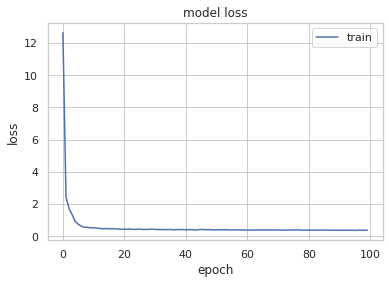

In [46]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'])
plt.show()

In [47]:
preds = model.predict(X_reg_test.values)

In [52]:
final_df_reg = pd.DataFrame(preds, columns=['Predicitions'])
final_df_reg

Predicitions
0        5.606143
1        6.192995
2        5.185484
3        4.926348
4        5.168359
..            ...
315      5.342100
316      5.604211
317      6.371638
318      6.210491
319      5.033935

[320 rows x 1 columns]

In [55]:
final_df_reg.to_csv('./reg_task1_preds.csv',index=False)

## Classification model

### Hyperparameter tuning

In [78]:
def class_model_hyper(hparams):
    model = Sequential()
    model.add(Dense(hparams[HP_DENSE_NUM], activation = hparams[HP_ACTIVATION], input_shape=(n_cols_class,)))
    model.add(Dense(hparams[HP_DENSE_NUM]/2, activation = hparams[HP_ACTIVATION]))  
    model.add(Dense(hparams[HP_DENSE_NUM]/4, activation = hparams[HP_ACTIVATION]))
    model.add(Dense(n_classes, activation='sigmoid'))      
    
    model.compile(optimizer=hparams[HP_OPTIMIZER], loss='categorical_crossentropy', metrics=['accuracy'])
    
    model.fit(X_class.values, y_class, batch_size=64, epochs=100, verbose=0)
    _, accuracy = model.evaluate(X_class.values,  y_class)
    
    return accuracy

In [79]:
HP_DENSE_NUM = hp.HParam('DENSE NUM', hp.Discrete([64, 128])) 
HP_OPTIMIZER = hp.HParam('optimizer', hp.Discrete(['adam', 'sgd','RMSprop']))
HP_ACTIVATION = hp.HParam('activation func', hp.Discrete(['relu', 'gelu','selu']))
METRIC_ACCURACY = 'accuracy'


with tf.summary.create_file_writer('logs/hparam_tuning_class_task1').as_default():
  hp.hparams_config(
    hparams=[HP_DENSE_NUM ,HP_OPTIMIZER, HP_ACTIVATION],
    metrics=[hp.Metric(METRIC_ACCURACY, display_name='Accuracy')],
  )

In [80]:
def run(run_dir, hparams):
  with tf.summary.create_file_writer(run_dir).as_default():
    hp.hparams(hparams)  # record the values used in this trial
    accuracy = class_model_hyper(hparams)
    tf.summary.scalar(METRIC_ACCURACY, accuracy, step=1)

In [81]:
session_num = 0
for dense_num in HP_DENSE_NUM.domain.values:
    for optimizer in HP_OPTIMIZER.domain.values:
        for act in HP_ACTIVATION.domain.values:
            hparams = {
              HP_DENSE_NUM: dense_num,
              HP_OPTIMIZER: optimizer,
              HP_ACTIVATION: act

            }
            run_name = "run-%d" % session_num
            print('--- Starting trial: %s' % run_name)
            print({h.name: hparams[h] for h in hparams})
            run('logs/hparam_tuning_class_task1/' + run_name, hparams)
            session_num += 1

--- Starting trial: run-0
{'DENSE NUM': 64, 'optimizer': 'RMSprop', 'activation func': 'gelu'}
40/40 [==============================] - 0s 816us/step - loss: 0.4133 - accuracy: 0.8336
--- Starting trial: run-1
{'DENSE NUM': 64, 'optimizer': 'RMSprop', 'activation func': 'relu'}
40/40 [==============================] - 0s 704us/step - loss: 0.3996 - accuracy: 0.8438
--- Starting trial: run-2
{'DENSE NUM': 64, 'optimizer': 'RMSprop', 'activation func': 'selu'}
40/40 [==============================] - 0s 668us/step - loss: 0.3740 - accuracy: 0.8500
--- Starting trial: run-3
{'DENSE NUM': 64, 'optimizer': 'adam', 'activation func': 'gelu'}
40/40 [==============================] - 0s 910us/step - loss: 0.3552 - accuracy: 0.8664
--- Starting trial: run-4
{'DENSE NUM': 64, 'optimizer': 'adam', 'activation func': 'relu'}
40/40 [==============================] - 0s 522us/step - loss: 0.3618 - accuracy: 0.8664
--- Starting trial: run-5
{'DENSE NUM': 64, 'optimizer': 'adam', 'activation func': 's

In [3]:
%tensorboard --logdir logs/hparam_tuning_class_task1 --host localhost

### Final model on 10-fold cross validation
Best params are:
- DENSE_NUM = 128
- optimizer = RMSprop
- activation = gelu

reached an accuracy of 88.359%

In [83]:
def class_model(n_cols, n_classes):
    model = Sequential()
    model.add(Dense(128, activation='gelu', input_shape=(n_cols,)))
    model.add(Dense(64, activation='gelu'))
    model.add(Dense(32, activation='gelu'))    
    model.add(Dense(n_classes, activation='sigmoid'))    
    
    
    model.compile(optimizer='RMSprop', loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

In [84]:
kfold = KFold(n_splits=10, shuffle=True)
fold_no = 1

for train, test in kfold.split(X_reg, y_reg):
    print("################################")
    print(f"Training for fold {fold_no} ...")
    model = class_model(n_cols_class, n_classes)
    history = model.fit(X_class.iloc[train].values, y_class[train], batch_size=64, epochs=100, verbose=0)
    scores = model.evaluate(X_class.iloc[test].values, y_class[test], verbose=5)

    print(f"Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]}")
    
    fold_no += 1

################################
Training for fold 1 ...
Score for fold 1: loss of 0.45641568303108215; accuracy of 0.84375
################################
Training for fold 2 ...
Score for fold 2: loss of 0.47395047545433044; accuracy of 0.8359375
################################
Training for fold 3 ...
Score for fold 3: loss of 0.3523411154747009; accuracy of 0.859375
################################
Training for fold 4 ...
Score for fold 4: loss of 0.4803852140903473; accuracy of 0.8359375
################################
Training for fold 5 ...
Score for fold 5: loss of 0.4883931875228882; accuracy of 0.84375
################################
Training for fold 6 ...
Score for fold 6: loss of 0.5163677334785461; accuracy of 0.8125
################################
Training for fold 7 ...
Score for fold 7: loss of 0.5340051054954529; accuracy of 0.8125
################################
Training for fold 8 ...
Score for fold 8: loss of 0.36665716767311096; accuracy of 0.8828125
########

### Final classification model

In [85]:
model = class_model(n_cols_class, n_classes)

In [86]:
history = model.fit(X_class.values,y_class,epochs=100)

Epoch 1/100
40/40 [==============================] - 0s 1ms/step - loss: 0.9141 - accuracy: 0.7127
Epoch 2/100
40/40 [==============================] - 0s 1ms/step - loss: 0.5689 - accuracy: 0.8139
Epoch 3/100
40/40 [==============================] - 0s 1ms/step - loss: 0.5727 - accuracy: 0.8208
Epoch 4/100
40/40 [==============================] - 0s 974us/step - loss: 0.5430 - accuracy: 0.8225
Epoch 5/100
40/40 [==============================] - 0s 979us/step - loss: 0.5500 - accuracy: 0.8265
Epoch 6/100
40/40 [==============================] - 0s 946us/step - loss: 0.5285 - accuracy: 0.8325
Epoch 7/100
40/40 [==============================] - 0s 1ms/step - loss: 0.5409 - accuracy: 0.8207
Epoch 8/100
40/40 [==============================] - 0s 968us/step - loss: 0.4929 - accuracy: 0.8280
Epoch 9/100
40/40 [==============================] - 0s 939us/step - loss: 0.5275 - accuracy: 0.8206
Epoch 10/100
40/40 [==============================] - ETA: 0s - loss: 0.3009 - accuracy: 0.93 - 0s 

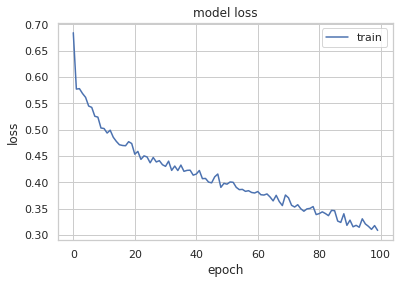

In [87]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'])
plt.show()

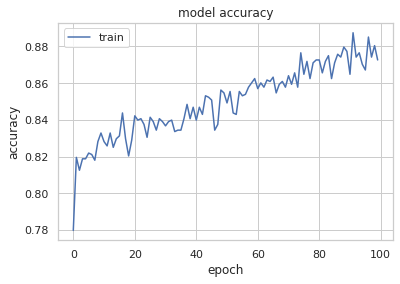

In [89]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'])
plt.show()

In [99]:
preds = model.predict(X_class_test)
class_preds = np.argmax(preds, axis=-1)
class_preds = class_preds+1
class_preds

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 1,
       2, 3, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2,
       3, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 3, 2, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 3, 3, 2, 2,
       3, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2,
       3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2,
       2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 3, 3, 2,
       2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [100]:
final_df_class = pd.DataFrame(class_preds, columns=['Predicitions'])
final_df_class

Predicitions
0               2
1               2
2               2
3               2
4               2
..            ...
315             2
316             2
317             2
318             3
319             2

[320 rows x 1 columns]

with 1 = bad, 2 = average and 3 = good

In [101]:
final_df_class.to_csv('./class_task1_preds.csv',index=False)

# Conclusion
Both the classification and regression tasks were completed successfully, EDA has been applied on the dataset alognside pre-processing and selecting features for both models.

The outputs could be seen in both class_task1_preds.csv and reg_task1_preds.csv